In [59]:
import os
import shap
import numpy as np
import pandas as pd
import xgboost as xgb
import catboost as cb
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

shap.initjs()

# Импортируем датасет

In [7]:
data = pd.read_csv("data.csv")
data.head(n=2)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Удаляем столбцы и приводим датасет к тому виду, как был нужен для других уроков с этим датасетом(чтобы потом сравнивать результаты моделей)

In [10]:
data = data[['isFraud', 'TransactionAmt', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1']]

In [11]:
data

,isFraud,TransactionAmt,card1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1
0,0,68.500,13926,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0
1,0,29.000,2755,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0,59.000,4663,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0,50.000,18132,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0
4,0,50.000,4497,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,55.385,2256,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
99996,0,117.000,2518,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,2.0,14.0
99997,0,50.000,2748,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,25.0
99998,0,100.000,16075,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0


# Делим на тест и треин

In [13]:
x_train, x_test = train_test_split(
    data.drop(["isFraud"], axis=1), train_size=0.7, random_state=1
)
y_train, y_test = train_test_split(
    data["isFraud"], train_size=0.7, random_state=1
)

In [61]:
scaller = StandardScaler()

In [62]:
x_train = scaller.fit_transform(x_train)
x_test = scaller.transform(x_test)

# Обучаем базовую модель катбуста

In [63]:
model_1 = cb.CatBoostClassifier(random_state=27)
model_1.fit(x_train, y_train)

Learning rate set to 0.063211
0:	learn: 0.5862561	total: 24.4ms	remaining: 24.4s
1:	learn: 0.4966476	total: 40.3ms	remaining: 20.1s
2:	learn: 0.4241390	total: 55.6ms	remaining: 18.5s
3:	learn: 0.3657505	total: 70.8ms	remaining: 17.6s
4:	learn: 0.3201338	total: 87.2ms	remaining: 17.4s
5:	learn: 0.2822190	total: 102ms	remaining: 16.8s
6:	learn: 0.2538220	total: 116ms	remaining: 16.5s
7:	learn: 0.2285392	total: 132ms	remaining: 16.4s
8:	learn: 0.2058343	total: 148ms	remaining: 16.3s
9:	learn: 0.1871970	total: 165ms	remaining: 16.3s
10:	learn: 0.1725764	total: 181ms	remaining: 16.2s
11:	learn: 0.1598040	total: 200ms	remaining: 16.5s
12:	learn: 0.1498144	total: 222ms	remaining: 16.9s
13:	learn: 0.1413867	total: 242ms	remaining: 17.1s
14:	learn: 0.1347761	total: 259ms	remaining: 17s
15:	learn: 0.1282776	total: 277ms	remaining: 17s
16:	learn: 0.1226936	total: 293ms	remaining: 17s
17:	learn: 0.1192719	total: 308ms	remaining: 16.8s
18:	learn: 0.1161439	total: 323ms	remaining: 16.7s
19:	learn: 0

160:	learn: 0.0744130	total: 3.2s	remaining: 16.7s
161:	learn: 0.0743033	total: 3.21s	remaining: 16.6s
162:	learn: 0.0742441	total: 3.23s	remaining: 16.6s
163:	learn: 0.0741202	total: 3.25s	remaining: 16.6s
164:	learn: 0.0740707	total: 3.27s	remaining: 16.6s
165:	learn: 0.0740053	total: 3.29s	remaining: 16.5s
166:	learn: 0.0739942	total: 3.3s	remaining: 16.5s
167:	learn: 0.0739813	total: 3.32s	remaining: 16.4s
168:	learn: 0.0738885	total: 3.34s	remaining: 16.4s
169:	learn: 0.0738494	total: 3.35s	remaining: 16.4s
170:	learn: 0.0737911	total: 3.37s	remaining: 16.3s
171:	learn: 0.0737414	total: 3.39s	remaining: 16.3s
172:	learn: 0.0736677	total: 3.41s	remaining: 16.3s
173:	learn: 0.0736036	total: 3.43s	remaining: 16.3s
174:	learn: 0.0735765	total: 3.45s	remaining: 16.3s
175:	learn: 0.0735056	total: 3.47s	remaining: 16.2s
176:	learn: 0.0734586	total: 3.48s	remaining: 16.2s
177:	learn: 0.0734428	total: 3.5s	remaining: 16.2s
178:	learn: 0.0733728	total: 3.52s	remaining: 16.1s
179:	learn: 0.0

328:	learn: 0.0657932	total: 6.92s	remaining: 14.1s
329:	learn: 0.0657498	total: 6.94s	remaining: 14.1s
330:	learn: 0.0657352	total: 6.95s	remaining: 14.1s
331:	learn: 0.0656571	total: 6.97s	remaining: 14s
332:	learn: 0.0655715	total: 6.99s	remaining: 14s
333:	learn: 0.0655413	total: 7.01s	remaining: 14s
334:	learn: 0.0655139	total: 7.03s	remaining: 13.9s
335:	learn: 0.0654946	total: 7.04s	remaining: 13.9s
336:	learn: 0.0654598	total: 7.06s	remaining: 13.9s
337:	learn: 0.0654094	total: 7.08s	remaining: 13.9s
338:	learn: 0.0653789	total: 7.1s	remaining: 13.8s
339:	learn: 0.0652865	total: 7.12s	remaining: 13.8s
340:	learn: 0.0652605	total: 7.13s	remaining: 13.8s
341:	learn: 0.0652479	total: 7.15s	remaining: 13.8s
342:	learn: 0.0652313	total: 7.17s	remaining: 13.7s
343:	learn: 0.0651865	total: 7.19s	remaining: 13.7s
344:	learn: 0.0651478	total: 7.21s	remaining: 13.7s
345:	learn: 0.0651332	total: 7.24s	remaining: 13.7s
346:	learn: 0.0650650	total: 7.26s	remaining: 13.7s
347:	learn: 0.06502

496:	learn: 0.0598032	total: 10.1s	remaining: 10.2s
497:	learn: 0.0597550	total: 10.1s	remaining: 10.2s
498:	learn: 0.0597497	total: 10.1s	remaining: 10.2s
499:	learn: 0.0596743	total: 10.2s	remaining: 10.2s
500:	learn: 0.0596431	total: 10.2s	remaining: 10.1s
501:	learn: 0.0596291	total: 10.2s	remaining: 10.1s
502:	learn: 0.0595908	total: 10.2s	remaining: 10.1s
503:	learn: 0.0595389	total: 10.2s	remaining: 10.1s
504:	learn: 0.0595147	total: 10.3s	remaining: 10s
505:	learn: 0.0594994	total: 10.3s	remaining: 10s
506:	learn: 0.0594608	total: 10.3s	remaining: 10s
507:	learn: 0.0594505	total: 10.3s	remaining: 9.97s
508:	learn: 0.0594254	total: 10.3s	remaining: 9.95s
509:	learn: 0.0593950	total: 10.3s	remaining: 9.93s
510:	learn: 0.0593869	total: 10.4s	remaining: 9.91s
511:	learn: 0.0593597	total: 10.4s	remaining: 9.89s
512:	learn: 0.0593347	total: 10.4s	remaining: 9.88s
513:	learn: 0.0593300	total: 10.4s	remaining: 9.87s
514:	learn: 0.0593182	total: 10.5s	remaining: 9.86s
515:	learn: 0.0593

656:	learn: 0.0558143	total: 13.3s	remaining: 6.94s
657:	learn: 0.0558005	total: 13.3s	remaining: 6.92s
658:	learn: 0.0557937	total: 13.3s	remaining: 6.9s
659:	learn: 0.0557803	total: 13.4s	remaining: 6.88s
660:	learn: 0.0557764	total: 13.4s	remaining: 6.86s
661:	learn: 0.0557660	total: 13.4s	remaining: 6.84s
662:	learn: 0.0557483	total: 13.4s	remaining: 6.82s
663:	learn: 0.0556987	total: 13.4s	remaining: 6.8s
664:	learn: 0.0556590	total: 13.5s	remaining: 6.79s
665:	learn: 0.0556291	total: 13.5s	remaining: 6.77s
666:	learn: 0.0556198	total: 13.5s	remaining: 6.75s
667:	learn: 0.0556161	total: 13.6s	remaining: 6.73s
668:	learn: 0.0555997	total: 13.6s	remaining: 6.72s
669:	learn: 0.0555623	total: 13.6s	remaining: 6.7s
670:	learn: 0.0555522	total: 13.6s	remaining: 6.68s
671:	learn: 0.0555470	total: 13.6s	remaining: 6.65s
672:	learn: 0.0555073	total: 13.7s	remaining: 6.63s
673:	learn: 0.0554631	total: 13.7s	remaining: 6.61s
674:	learn: 0.0554533	total: 13.7s	remaining: 6.59s
675:	learn: 0.0

821:	learn: 0.0523817	total: 16.4s	remaining: 3.56s
822:	learn: 0.0523509	total: 16.5s	remaining: 3.54s
823:	learn: 0.0523327	total: 16.5s	remaining: 3.52s
824:	learn: 0.0523092	total: 16.5s	remaining: 3.5s
825:	learn: 0.0522904	total: 16.5s	remaining: 3.48s
826:	learn: 0.0522889	total: 16.5s	remaining: 3.46s
827:	learn: 0.0522542	total: 16.6s	remaining: 3.44s
828:	learn: 0.0522434	total: 16.6s	remaining: 3.42s
829:	learn: 0.0522254	total: 16.6s	remaining: 3.4s
830:	learn: 0.0521983	total: 16.6s	remaining: 3.38s
831:	learn: 0.0521805	total: 16.6s	remaining: 3.36s
832:	learn: 0.0521629	total: 16.6s	remaining: 3.34s
833:	learn: 0.0521576	total: 16.7s	remaining: 3.32s
834:	learn: 0.0521540	total: 16.7s	remaining: 3.3s
835:	learn: 0.0521277	total: 16.7s	remaining: 3.28s
836:	learn: 0.0521262	total: 16.7s	remaining: 3.26s
837:	learn: 0.0521217	total: 16.8s	remaining: 3.24s
838:	learn: 0.0521101	total: 16.8s	remaining: 3.22s
839:	learn: 0.0520978	total: 16.8s	remaining: 3.2s
840:	learn: 0.05

985:	learn: 0.0493171	total: 19.5s	remaining: 276ms
986:	learn: 0.0493161	total: 19.5s	remaining: 257ms
987:	learn: 0.0493126	total: 19.5s	remaining: 237ms
988:	learn: 0.0492852	total: 19.5s	remaining: 217ms
989:	learn: 0.0492507	total: 19.5s	remaining: 197ms
990:	learn: 0.0492320	total: 19.6s	remaining: 178ms
991:	learn: 0.0492300	total: 19.6s	remaining: 158ms
992:	learn: 0.0492178	total: 19.6s	remaining: 138ms
993:	learn: 0.0492046	total: 19.6s	remaining: 118ms
994:	learn: 0.0491799	total: 19.6s	remaining: 98.6ms
995:	learn: 0.0491789	total: 19.6s	remaining: 78.9ms
996:	learn: 0.0491611	total: 19.7s	remaining: 59.1ms
997:	learn: 0.0491483	total: 19.7s	remaining: 39.4ms
998:	learn: 0.0491439	total: 19.7s	remaining: 19.7ms
999:	learn: 0.0491228	total: 19.7s	remaining: 0us


In [64]:
y_pred = model_1.predict_proba(x_test)
score = roc_auc_score(y_test, y_pred[:, 1])
print(f"ROC_AUC = {round(score, 4)}")

ROC_AUC = 0.9014


# Обучаем базовую модель xgb

In [65]:
model_2 = xgb.XGBClassifier(random_state=27)
model_2.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=27,
              reg_alpha=0, reg_lambda=1, ...)

In [66]:
y_pred = model_2.predict_proba(x_test)
score = roc_auc_score(y_test, y_pred[:, 1])
print(f"ROC_AUC = {round(score, 4)}")

ROC_AUC = 0.9131


Таким образом, на одних и тех же данных результаты xgb лучше. Плюс ко всему данная базовая модель обучалась быстрее 

# Обучение модели XGBoost с использование оригинального API

In [83]:
xgb_params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "reg_lambda": 0.1,
    "max_depth": 4, 
    "random_state": 27
}

dtrain = xgb.DMatrix(
    data=x_train, label=y_train
)
dtest = xgb.DMatrix(
    data=x_test, label=y_test
)

In [84]:
dtrain

In [85]:
evals_result = {}

model = xgb.train(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=1000,
    maximize=True,
    early_stopping_rounds=30,
    evals_result=evals_result,
    evals=[(dtrain, "train"), (dtest, "test")],
    verbose_eval=25,
    
)

[0]	train-auc:0.75339	test-auc:0.75320
[25]	train-auc:0.82768	test-auc:0.81648
[50]	train-auc:0.88229	test-auc:0.86129
[75]	train-auc:0.89961	test-auc:0.87009
[100]	train-auc:0.90982	test-auc:0.87618
[125]	train-auc:0.91872	test-auc:0.88066
[150]	train-auc:0.92549	test-auc:0.88433
[175]	train-auc:0.93051	test-auc:0.88665
[200]	train-auc:0.93441	test-auc:0.88891
[225]	train-auc:0.93774	test-auc:0.89063
[250]	train-auc:0.94147	test-auc:0.89272
[275]	train-auc:0.94521	test-auc:0.89533
[300]	train-auc:0.94772	test-auc:0.89654
[325]	train-auc:0.95029	test-auc:0.89858
[350]	train-auc:0.95293	test-auc:0.90088
[375]	train-auc:0.95506	test-auc:0.90228
[400]	train-auc:0.95718	test-auc:0.90321
[425]	train-auc:0.95835	test-auc:0.90374
[450]	train-auc:0.96016	test-auc:0.90471
[475]	train-auc:0.96164	test-auc:0.90532
[500]	train-auc:0.96339	test-auc:0.90641
[525]	train-auc:0.96509	test-auc:0.90766
[550]	train-auc:0.96612	test-auc:0.90833
[575]	train-auc:0.96746	test-auc:0.90906
[600]	train-auc:0.968

Text(0, 0.5, 'ROC-AUC')

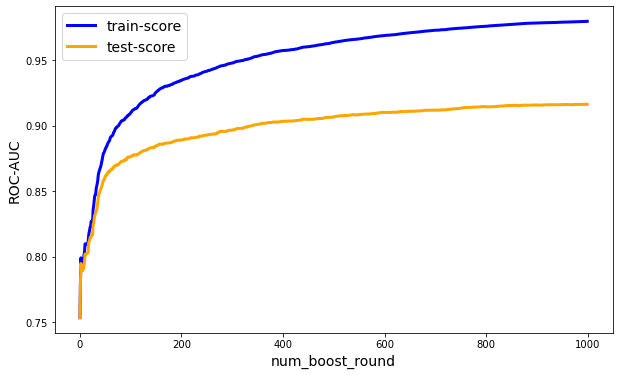

In [86]:
fig = plt.figure(figsize=(10, 6))
plt.plot(evals_result["train"]["auc"], linewidth=3, label="train-score", color="blue")
plt.plot(evals_result["test"]["auc"], linewidth=3, label="test-score", color="orange")
plt.legend(loc="best", fontsize=14)
plt.xlabel("num_boost_round", size=14)
plt.ylabel("ROC-AUC", size=14)

In [95]:
y_pred = model.predict(dtest)
score = roc_auc_score(y_test, y_pred)
print(f"ROC_AUC = {round(score, 4)}")

ROC_AUC = 0.9161


# Результат с подбором гиперпараметров оказался лучше двух предыдущих, но имеет место переобучение модели 